In [ ]:
import numpy as np

class Perceptron(object):

  def __init__(self, eta=0.01, n_iter=50, random_state=1):
    self.eta=eta
    self.n_iter=n_iter
    self.random_state=random_state

  def fit(self, X, y):
    rgen = np.random.RandomState(self.random_state)
    self.w_=rgen.normal(loc=0.0, scale=0.01, size=1+X.shape[1])
    self.errors_=[]

    for _ in range(self.n_iter):
      errors=0

      for xi, target in zip(X, y):
        update=self.eta * (target - self.predict(xi))
        self.w_[1:]+=update *xi
        self.w_[0]+=update
        errors+= int(update!=0.0)

      self.errors_.append(errors)
    return self


  def net_input(self,X):
    return np.dot(X, self.w_[1:]) +self.w_[0]

  def predict(self,X):
    return np.where(self.net_input(X)>=0.0, 1, -1)



 load the Iris dataset directly from the UCI  Machine Learning Repository into a DataFrame object

In [ ]:
import os
import pandas as pd

s=os.path.join('https://archive.ics.uci.edu', 'ml', 'machine-learning-databases', 'iris','iris.data')

In [ ]:
df=pd.read_csv(s,header=None,encoding='utf-8')
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In the code below, we extract the label column and save it in a NumPy array. Then, we replace the value 'Iris-setosa' with -1 and other values with 1.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#select setosa and versicolor
y=df.iloc[0:100,4].values
y=np.where(y=='Iris-setosa', -1, 1)
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [ ]:
#extract sepal length and petal length
X=df.iloc[0:100, [0, 2]].values

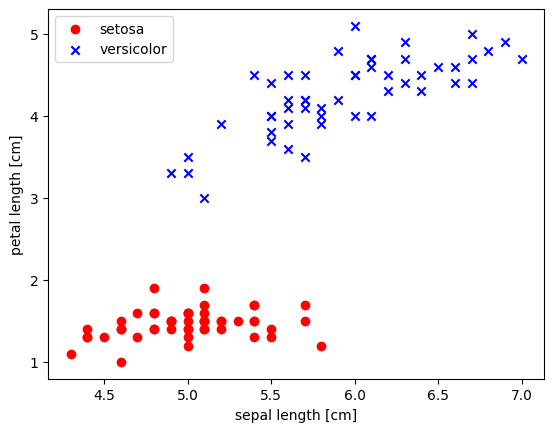

In [ ]:
#plot data
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

rename the columns of df for better understading

In [ ]:
df.columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In this two-dimensional feature subspace, we can see that a linear
decision boundary should be sufficient to separate Setosa from Versicolor flowers.

**Train the perceptron algorithm on the Iris data subset**

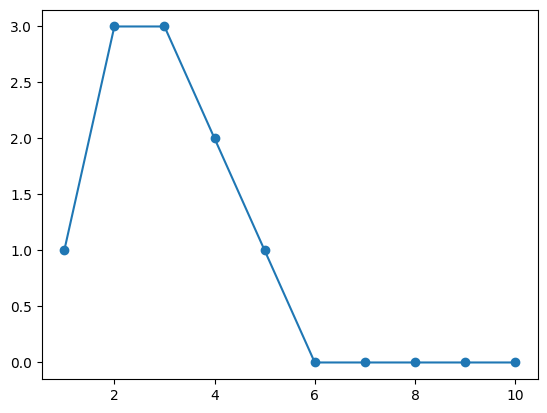

In [ ]:
ppn=Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='o')

In [ ]:
from matplotlib.colors import ListedColormap

def plot_decition_regions(X, y, classifier, resolution=0.02):
  # setup marker generator and color map
  markers = ('s', 'x', 'o', '^', 'v')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])

  # plot the decision surface
  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
  np.arange(x2_min, x2_max, resolution))
  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)
  plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  # plot class examples
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0],y=X[y == cl, 1],alpha=0.8,c=colors[idx],marker=markers[idx],label=cl,edgecolor='black')
